### 텍스트 정제
- 형태소 분석 (split)
    - 태그만 추출, 사용
- .morphs() : 형태소 단위로 분리
- .nouns() : 명사만 추출
- .pos() : 품사 태깅

### okt 만 제공하는 함수
- 문장 정규화 okt.morphs(text, norm=True)
- 어간 추출 okt.morphs(text, stem=True)
- 동시사용 okt.morphs(text, norm=True,stem=true)

In [1]:
from konlpy.tag import Okt
okt=Okt()

okt.morphs('설치가 잘 되었는지 확인 해봅시다.')


['설치', '가', '잘', '되었는지', '확인', '해봅시다', '.']

In [2]:
text = '나는 오늘 친구와 함께 영화를 볼 계획이다.'

okt.morphs(text)

['나', '는', '오늘', '친구', '와', '함께', '영화', '를', '볼', '계획', '이다', '.']

In [3]:
okt.pos(text)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('오늘', 'Noun'),
 ('친구', 'Noun'),
 ('와', 'Josa'),
 ('함께', 'Adverb'),
 ('영화', 'Noun'),
 ('를', 'Josa'),
 ('볼', 'Noun'),
 ('계획', 'Noun'),
 ('이다', 'Josa'),
 ('.', 'Punctuation')]

In [4]:
okt.nouns(text)

['나', '오늘', '친구', '영화', '볼', '계획']

In [5]:
text='나는 오늘 끝나고 저녁 맛있는거 먹을꺼얔ㅋㅋㅋ'

okt.morphs(text, stem=True)

['나', '는', '오늘', '끝나다', '저녁', '맛있다', '먹다', '얔', 'ㅋㅋㅋ']

In [6]:
okt.morphs(text, norm=True)

['나', '는', '오늘', '끝나고', '저녁', '맛있는거', '먹을꺼야', 'ㅋㅋㅋ']

In [7]:
okt.morphs(text, norm=True, stem=True)

['나', '는', '오늘', '끝나다', '저녁', '맛있다', '먹다', 'ㅋㅋㅋ']

In [8]:
okt.pos(text, norm=True, stem=True)

[('나', 'Noun'),
 ('는', 'Josa'),
 ('오늘', 'Noun'),
 ('끝나다', 'Verb'),
 ('저녁', 'Noun'),
 ('맛있다', 'Adjective'),
 ('먹다', 'Verb'),
 ('ㅋㅋㅋ', 'KoreanParticle')]

## 불용어 제거하기
- 자주 사용되지만 특별한 의미 부여가 어려운 단어들을 제거
- 일반적으로 불용어 사전은 리스트 형태를 만들어 사용
- 불용어 사전이 있다고 가정했을 때 불용어를 제거하는 define 함수를 만들어보자
- 불용어가 제거되고, 형용사와 동사만 추출할 수 있는 define 함수를 만들어 보자
- 태그이름 형용사 : 'Adjective', 동사 : 'Verb', 명사 : 'Noun'

In [9]:
stopwords = ['있다', '되다', '하다']
# text='나는 오늘 끝나고 저녁 맛있는거 먹을꺼얔ㅋㅋㅋ'

text = '화면이 있다. 고양이가 출근 하다'
def extract_tags(value):
    v_pos = okt.pos(value, stem=True, norm = True)
    
    n=0
    n_list =[]
    while n < len(v_pos):
        for j in stopwords:
            if v_pos[n][0] == j:
                n_list.append(n)
        n = n+1
    n_list.sort(reverse = True)
    for i in n_list:
        del v_pos[i]
        
    result =[]
    for i in v_pos:
        if i[1] == 'Adjective' or i[1] == 'Verb' or i[1] == 'Noun':
            result.append(i[0])
    return result
extract_tags(text)


['화면', '고양이', '출근']

In [10]:
def extract_tag(string):
    result_word=[]
    result = okt.pos(string, stem = True, norm = True)
    for word, tag in result:
        if tag in['Verb', 'Noun', 'Adjective']:
            if word not in stopwords:
                result_word.append(word)
    return result_word

extract_tag(text)

['화면', '고양이', '출근']

In [11]:
import nltk
from nltk import pos_tag
# nltk.download('popular')

In [12]:
text = 'The little yellow dog barked at the Persian cat'

split_text = nltk.word_tokenize(text)

split_text


['The', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'Persian', 'cat']

In [13]:
nltk.pos_tag(split_text)

[('The', 'DT'),
 ('little', 'JJ'),
 ('yellow', 'JJ'),
 ('dog', 'NN'),
 ('barked', 'VBD'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('Persian', 'JJ'),
 ('cat', 'NN')]

In [14]:
nltk.corpus.stopwords.words('english') #소문자만 있음

text.lower()


'the little yellow dog barked at the persian cat'

## 불용어 제거
- 동사, 형용사, 명사 추출

In [15]:
text = 'I Love You'

def extract_tag_english(string):
    
    split_string = nltk.word_tokenize(string)
    result = nltk.pos_tag(split_string)
    
    result_word=[]
    for word, tag in result:
        # if word.lower() in nltk.corpus.stopwords.words('english'):
        #     continue
        if tag in['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ' 'JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS']:
            if word.lower() not in nltk.corpus.stopwords.words('english'):
                result_word.append(word)
    return result_word

extract_tag_english(text)

['Love']

## pickle 라이브러리
- 데이터프레임의 형태로 저장하기 곤란할 때
- 데이터를 타입 그대로 저장해주는 파이썬 내장 라이브러리



In [16]:
import pickle

# 저장하기
# with open('파일 이름.pkl', "wb") as f:
#     pickle.dump(저장할 변수, f)
    
# 불러오기
# with open('파일 이름.pkl', "rb") as f:
#     피클 데이터의 변수이름 = pickle.load(f)

In [17]:
text = 'The little yellow dog barked at the Persian cat'
result = nltk.word_tokenize(text)

with open('save_data.pkl', 'wb') as f:
    pickle.dump(result, f)

In [18]:
with open('save_data.pkl', 'rb') as f:
    data = pickle.load(f)

data

['The', 'little', 'yellow', 'dog', 'barked', 'at', 'the', 'Persian', 'cat']

## 빈도 분석: 워드 클라우드
- 문자의 빈출 경황의 정도를 분석
- 수집, 전처리, 카운팅, wordcloud 시각화

In [19]:
# !pip install wordcloud

from wordcloud import WordCloud
from collections import Counter # 워드를 카운팅해주는 라이브러리
import matplotlib.pyplot as plt # 데이터를 시각화 해주는 라이브러리

In [37]:
news = '북미에서 생산된 전기차에 대해서만 세액공제 혜택을 주는 미국의 인플레이션 감축법(IRA)에 대해 한국을 포함한 동맹국들이 대미 외교전에 나선 가운데 미국과 유럽연합(EU) 통상담당 대표가 회동했다고 로이터 통신이 14일(현지시간) 보도했습니다.\n\n미 무역대표부(USTR)은 이날 캐서린 타이 대표가 독일에서 발디스 돔브로우스키스 EU 통상담당 수석부집행위원장(이하 부위원장)과 양자 회동을 하고 "IRA의 전기차 세액공제에 대한 논의를 지속하는 데 합의했다"고 밝혔습니다.\n\n타이 대표는 14일, 15일 양일간 일정으로 열리는 주요 7개국(G7) 통상장관회의를 위해 독일을 방문했습니다.\n\n구체적인 회동 내용은 공개되지 않았습니다.\n\n다만 EU가 이미 한국과 마찬가지로 미국의 새 전기차 세액공제안이 세계무역기구(WTO) 규정과 상충한다는 입장을 이미 밝힌 만큼, 미측에 IRA 시행에 따른 유럽산 전기차의 불이익 우려를 적극적으로 제기했을 것으로 보입니다.\n\n조 바이든 미국 대통령이 지난달 서명한 IRA는 미국에서 생산되고 일정 비율 이상 북미에서 제조된 배터리와 핵심 광물을 사용한 전기차에만 최대 7천500달러의 세액공제 혜택을 주도록 규정했습니다.\n\n이 법률이 원안대로 시행되면 한국, EU 등 다른 국가에서 제조된 전기차는 이 혜택을 받을 수 없게 됩니다.\n\n안덕근 산업통상자원부 통상교섭본부장은 13일 정부세종청사 브리핑에서 IRA 이슈와 관련해 한미 양국이 이번주 후반 국장급 실무협의를 열어 세부 사항에 대한 협의에 나설 것이라고 밝힌 바 있습니다.\n\n안 본부장은 내주 열리는 주요 20개국(G20) 통상장관회의 등을 계기로 타이 대표와 별도로 만나 지속 협의할 계획이라고 덧붙였습니다.\n\n대미 협상력을 키우기 위해 한국, EU 등 피해 예상국 간 공조 가능성도 커지고 있습니다.\n\n안 본부장은 "유사한 상황에 있는 EU(유럽연합), 독일, 일본 등과도 협의를 지속해 공조하는 방안을 찾아 나갈 계획"이라고 말했습니다.\n\n(사진=게티이미지코리아)음주운전 사고를 내 징계를 당했던 전 스피드스케이팅 남자 국가대표 김민석 선수(성남시청)의 2026년 동계올림픽 출전 여부가 경찰 조사에 달린 것으로 알려졌습니다. 대한체육회의 한 관계자는 "현재 진행 중인 진천경찰서의 조사 결과에 따라 김민석 선수의 차기 올림픽 출전 가능 여부가 가려질 것으로 보인다"고 밝혔습니다.\n\n2022 베이징동계올림픽 동메달리스트인 김민석은 강화훈련 중이던 지난 7월 대표팀 동료 선수 3명과 함께 진천선수촌 인근 식당에서 술을 마신 뒤 선수촌 안에서 운전하다 보도블록을 들이받았습니다. 대한빙상경기연맹은 8월 8일 스포츠공정위원회를 열어 김민석에게 자격 정지 1년 6개월의 중징계를 내렸습니다. 하지만 이때만 해도 2026년 2월에 열리는 밀라노-코르티나담페초동계올림픽 출전에는 문제가 없을 것으로 보였습니다.\n\n이미지 확대하기\n\n그런데 대한체육회 <국가대표 선발 및 운영 규정>이 변수로 떠올랐습니다. 이 규정 제10조(결격 사유)에 따르면 "음주운전으로 500만 원 이상의 벌금형을 선고받고 그 형이 확정된 후 3년이 지나지 않은 사람은 국가대표가 될 수 없다"고 명시돼 있습니다. 또 500만 원 미만의 벌금형을 선고 받고 그 형이 확정된 후 2년이 지나지 않은 경우도 국가대표 자격이 발탁됩니다.\n\n이에 따라 김민석이 500만 원 이상의 벌금형을 선고 받으면 2026 밀라노동계올림픽 출전이 좌절됩니다. 최종 조사 결과는 올해 안에 나올 것으로 예상되는데 이로부터 3년 뒤는 2025년 연말이기 때문에 대표 선발전 일정을 고려하면 올림픽 출전은 거의 불가능합니다. 김민석이 500만 원 미만의 벌금을 받으면 2025년 초부터는 태극마크와 밀라노행에 도전할 길은 일단 열리게 됩니다.\n\n현행법을 살펴보면 \'혈중알코올농도\' 0.03%~0.08% 이하 수치가 측정될 경우 1년 이하 징역형 또는 500만 원 이하의 벌금형이 선고될 수 있습니다. 0.03%는 면허 정지, 0.08%는 면허 취소 기준입니다. 또 혈중알코올농도 0.08%~0.2% 미만일 경우에는 1년~2년 이하 징역 또는 500만원~ 1,000만 원 이하 벌금형이 내려지고 있습니다.\n\n김민석 선수가 음주운전을 한 것은 본인도 인정한 사실이지만 그는 경찰로부터 \'혈중알코올농도\'를 측정받지 않았습니다. 그러니까 음주운전에서 처벌 수위를 결정하는 데 가장 중요한 근거가 되는 측정치가 없는 것입니다.\n\n충북 진천경찰서는 식당 CCTV와 식당 주인의 증언 등을 통해 김민석의 음주량을 확인했습니다. 마신 술의 양과 마신 시간, 김민석의 체중을 종합적으로 고려해 혈중알코올농도를 추정하는데 김민석이 운전을 하다 진천선수촌 내 보도블록을 파손한 것은 불리하게 작용될 전망입니다.\n\n이미지 확대하기\n\n대한체육회 관계자는 "경찰은 3가지 가운데 하나를 선택할 것으로 보인다. 김민석에게 가장 좋은 시나리오는 처벌을 아예 받지 않는 것이다. 두 번째는 500만 원이 안 되는 벌금형을 받는 것이고, 최악의 경우는 500만 원이 넘는 벌금형이 나오는 것이다"고 말했습니다.\n\n김민석은 대표팀 동료 선수인 정재웅, 정재원, 정선교와 함께 지난 7월 22일 오후 진천선수촌 인근에서 식사 중 음주한 뒤 정재웅이 운전한 김민석 소유의 승용차를 타고 선수촌에 복귀했습니다. 이 가운데 김민석, 정재웅, 정선교는 숙소에서 휴식을 취하다 쇼트트랙 대표팀 박지윤(의정부시청)의 생일 파티에 초대 받고 선수촌 정문에 있는 웰컴센터로 내려갔고, 모임을 마친 김민석은 자신의 차량에 정재웅, 정선교, 박지윤을 태운 뒤 숙소로 복귀하는 과정에서 촌내 보도블록 경계석에 충돌하는 사고를 냈습니다. 이들은 사고 직후 차량을 버려둔 채 숙소로 들어갔으며, 대한체육회 조사를 통해 진상이 밝혀졌습니다.\n\n김민석은 2018 평창동계올림픽에서 스피드스케이팅 남자 팀추월 은메달, 남자 1,500ｍ 동메달을 땄고, 2022 베이징동계올림픽 남자 1,500ｍ 종목에서 동메달을 획득한 한국 빙속 중장거리 간판 선수입니다.인천국제공항이 세계 최초이자 유일한 \'5성급\' 공항으로 이름을 올렸습니다.\n\n인천국제공항공사는 14일(현지시간) 폴란드 크라쿠프 항공박물관에서 국제공항협의회(ACI) 주관으로 열린 고객경험 글로벌 서밋에서 \'ACI 고객경험인증\' 프로그램 중 최고단계인 5단계를 수상했습니다.\n\n고객경험인증제는 호텔 등급에 따라 부여되는 별처럼 2019년 ACI가 전 세계 공항의 고객경험 관리체계를 평가하기 위해 도입됐습니다.\n\n현재까지 아시아·태평양 18개·유럽 11개·미주 21개 등 60개 공항이 참여해 단계별로 엄격하게 심사를 받고 있습니다.\n\n주요 평가 항목은 고객이해, 전략, 운영개선, 지표측정, 협업체계, 서비스혁신 등입니다.\n\n인천공항의 고객경험인증 5단계 획득에는 12개 상주기관 경영진으로 구성된 서비스개선위원회, 34개 관계기관 고객접점 실무자로 구성된 고객경험 현장협의체 등 다양한 관계 기관 협업체계 구축이 긍정적인 영향을 끼친 것으로 전해졌습니다.\n\n인천공항은 지난해 9월 세계 최초로 4단계 인증을 획득한 데 이어 올해 5단계 인증을 받았으며, 개항 4년 만인 2005년부터 2016년까지 ACI에서 실시하는 세계공항서비스평가(ASQ) 1위를 12년 연속으로 달성한 진기록을 세우기도 했습니다.\n\n세계 공항 간 경쟁이 심화하며 신속성과 처리용량 같은 요소로 승부를 걸기 어려운 환경에서 차별화된 고객경험을 새로운 경쟁력으로 삼아온 공사의 전략이 주효했다는 평가도 나옵니다.\n\n이미지 확대하기\n\n공사는 이번 5단계 획득으로 인정받은 공항운영을 바탕으로 ACI와 고객경험 글로벌 교육과정을 개발하는 등 세계적인 공항산업 서비스 표준을 수립해 나갈 계획입니다.\n\n루이스 펠리페 ACI 사무총장은 "앞으로 평가자와 수검자의 관계가 아닌, 세계 공항 서비스 경쟁력 강화를 위해 함께 고민하는 협력자로서 인천공항의 역할이 기대된다"고 했습니다.\n\n김경욱 인천국제공항공사 사장은 "국민 여러분의 신뢰, 정부의 적극적인 지원, 그리고 8만 공항가족의 헌신적인 노력으로 이룬 세계 최초 고객경험인증 5단계 획득이라는 소중한 성과를 발판으로 앞으로 공항산업에서 빠른 추격자가 아닌 선도자로서 세계 공항산업의 새로운 표준을 선도해 나가겠다"고 말했습니다.\n\n(사진=연합뉴스)'

news = news.replace("\n", " ")
news = news.replace("\'", " ")


In [93]:
stopwords = ['있다', '안', '등', '이', '고', '것','되다', '등' , '수', '없다','원','이다','이하']

result = okt.pos(news, stem=True, norm=True)
result_word=[]
for word, tag in result:
    if tag in ['Noun','Adjective']:
        if word not in stopwords:
            result_word.append(word)


count = Counter(result_word)
count

count.most_common(30)


[('김민석', 16),
 ('공항', 11),
 ('고객', 11),
 ('세계', 10),
 ('경험', 9),
 ('단계', 8),
 ('벌금형', 7),
 ('전기차', 6),
 ('대표', 6),
 ('협의', 6),
 ('선수', 6),
 ('인증', 6),
 ('개', 6),
 ('미국', 5),
 ('한국', 5),
 ('통상', 5),
 ('동계올림픽', 5),
 ('출전', 5),
 ('획득', 5),
 ('서비스', 5),
 ('세액', 4),
 ('공제', 4),
 ('위해', 4),
 ('규정', 4),
 ('산업', 4),
 ('이미지', 4),
 ('음주운전', 4),
 ('남자', 4),
 ('국가대표', 4),
 ('조사', 4)]

<function matplotlib.pyplot.show(close=None, block=None)>

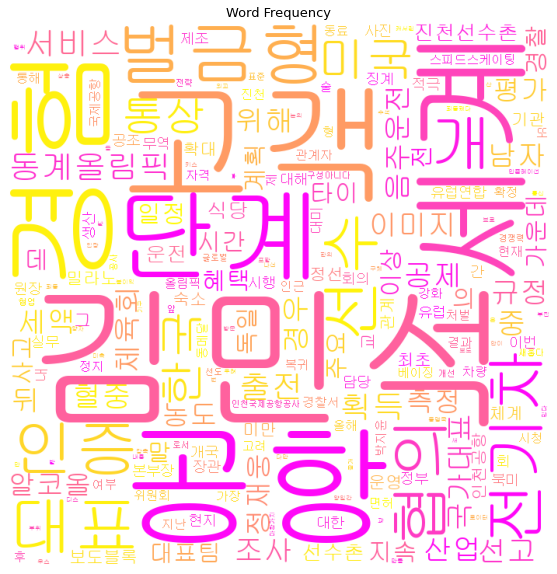

In [111]:
#워드 클라우드 선언

wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
                 width = 700,
                 height = 700,
                 background_color='white',
                 colormap = 'spring',
                 random_state=1).generate_from_frequencies(count)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Frequency", size = 13)
plt.show

In [112]:
from PIL import Image
import numpy as np

<function matplotlib.pyplot.show(close=None, block=None)>

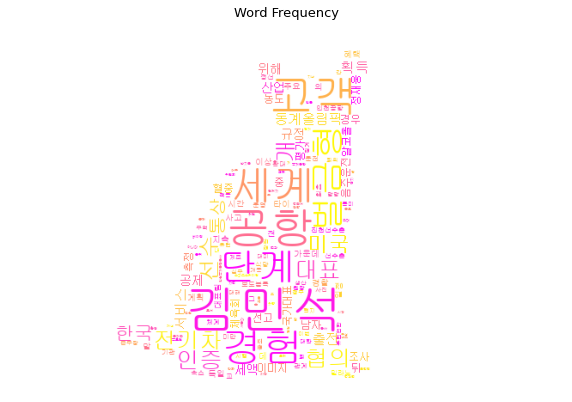

In [121]:
mask_image = np.array(Image.open(r'C:\Users\user\123.jpg'))


wordcloud = WordCloud(font_path='C:\\Windows\\Fonts\\gulim.ttc',
                 width = 700,
                 height = 700,
                 background_color='white',
                 colormap = 'spring',
                 mask = mask_image,
                 random_state=1).generate_from_frequencies(count)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis('off')
plt.title("Word Frequency", size = 13)
plt.show